In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
reviewsDF = pd.read_csv('DatasetFinal.csv')
reviewsDF['Brand Name'] = reviewsDF['Brand Name'].str.lower()
reviews = reviewsDF.Reviews.tolist()
brands = reviewsDF['Brand Name'].tolist()
ratings = reviewsDF['Rating'].tolist()
print("Loaded " + str(len(reviews)) + " reviews.")

Loaded 59255 reviews.


In [3]:
reviewsDF.head()

,Product Name,Brand Name,Rating,Reviews,Reviews_Votes
0,Samsung Electronics Galaxy Note 20 Ultra 5G Fa...,samsung,1,Received a used phone . Very disappointed!!,2
1,Samsung Electronics Galaxy Note 20 Ultra 5G Fa...,samsung,4,Update 8/31/20 IF YOU DIDN'T RECEIVE YOUR WIRE...,188
2,Samsung Electronics Galaxy Note 20 Ultra 5G Fa...,samsung,5,Great phone and food quality. I was able to us...,0
3,Samsung Electronics Galaxy Note 20 Ultra 5G Fa...,samsung,5,"La pantalla se ve impresionante, se escucha me...",30
4,Samsung Electronics Galaxy Note 20 Ultra 5G Fa...,samsung,1,"It came today. When opened the box, there was ...",1


In [4]:
import nltk
def get_all_phrases_containing_tar_wrd(target_word, tar_passage, left_margin = 5, right_margin = 5):
    """
        Function to get all the pharses that contain the target word in a text/passage tar_passage.
        Workaround to save the output given by nltk Concordance function
        
        str target_word --> aspect to be searched for
        str tar_passage  --> sentence extracted from a customer review
        int left_margin int right_margin --> left_margin and right_margin allocate the number of words/punctuation before and after target word
        Left margin will take note of the beginning of the text
    """
     
   
    tokens = nltk.word_tokenize(tar_passage)
    tokens = [x for x in tokens if len(x)>2] 
 
    text = nltk.Text(tokens)
 
 
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 

    
    concordance_txt = ([text.tokens[  list(map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset]))[0]:offset+right_margin] for offset in c.offsets(target_word)])

 
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [5]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [6]:
from nltk import sent_tokenize


relevant_aspects = ['battery', 'screen', 'camera', 'performance']


phrases = []
brand = []
rating = []
aspects = []
review_num = []
counter = 0

for review in reviews:
    try:
       
        for sentence in sent_tokenize(review):
            for  important_word in relevant_aspects:
               
                phrases_in_sentence = get_all_phrases_containing_tar_wrd(important_word, sentence, left_margin = 5, right_margin = 5) 
                for phrase in phrases_in_sentence:
                    brand.append(brands[counter])
                    rating.append(ratings[counter])
                    aspect = 'other'
                    for imp_word in relevant_aspects:
                        if imp_word in phrase.lower():
                            aspect = imp_word
                    aspects.append(aspect)
                    phrases.append(phrase)
                    review_num.append(counter)
    except:
        pass
    counter = counter + 1

print('Extracted ' + str(len(phrases)) + ' phrases from the reviews')


phrasesDF = pd.DataFrame()
phrasesDF['brand'] = brand 
phrasesDF['phrase'] = phrases
phrasesDF['rating'] = rating
phrasesDF['aspect'] = aspects
phrasesDF['review_id'] = review_num
phrasesDF.head()

Extracted 22131 phrases from the reviews


,brand,phrase,rating,aspect,review_id
0,samsung,even the note but this screen here bests all t...,4,screen,1
1,samsung,all this makes for outstanding screen,4,screen,1
2,samsung,Great main camera,4,camera,1
3,samsung,result but all all the camera top notch all its,4,camera,1
4,samsung,find phone with better main camera the market,4,camera,1


In [7]:
from afinn import Afinn
from nltk.corpus import gutenberg
import textwrap

In [8]:
afinn = Afinn()

In [9]:
afinn.score('This is oh so bad.')

-3.0

In [10]:
def detect_polarity(reviewsDF):
    return afinn.score(reviewsDF)

In [11]:
df_tb = phrasesDF.phrase.apply(detect_polarity)

In [12]:
df_tb.head()

0    0.0
1    5.0
2    3.0
3    2.0
4    2.0
Name: phrase, dtype: float64

In [13]:
phrasesDF["afinn_sentiment"] = phrasesDF.phrase.apply(detect_polarity)

In [14]:
phrasesDF.head(100)

,brand,phrase,rating,aspect,review_id,afinn_sentiment
0,samsung,even the note but this screen here bests all t...,4,screen,1,0.0
1,samsung,all this makes for outstanding screen,4,screen,1,5.0
2,samsung,Great main camera,4,camera,1,3.0
3,samsung,result but all all the camera top notch all its,4,camera,1,2.0
4,samsung,find phone with better main camera the market,4,camera,1,2.0
...,...,...,...,...,...,...
95,samsung,"better than the Note Ultra Camera 1,400 phone",1,camera,56,2.0
96,samsung,Camera game changer this phone,5,camera,57,0.0
97,samsung,Fast long battery life love the large,5,battery,60,3.0
98,samsung,battery life love the large screen,5,screen,60,3.0


In [15]:
nRow, nCol = phrasesDF.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 22131 rows and 6 columns


In [16]:
phrasesDF['comp_score'] = phrasesDF['afinn_sentiment'].apply(lambda c: 'best' if c >=0.75 else ('good' if c >=0.5 else ('better' if c >=0.25 else ('ok' if c >=0 else ('bad' if c <=-0.25 else ('very bad' if c <=-0.5 else ('worst' if c <=-0.75 else 'very worst')))))))

In [17]:
phrasesDF.head()

,brand,phrase,rating,aspect,review_id,afinn_sentiment,comp_score
0,samsung,even the note but this screen here bests all t...,4,screen,1,0.0,ok
1,samsung,all this makes for outstanding screen,4,screen,1,5.0,best
2,samsung,Great main camera,4,camera,1,3.0,best
3,samsung,result but all all the camera top notch all its,4,camera,1,2.0,best
4,samsung,find phone with better main camera the market,4,camera,1,2.0,best


In [18]:
phrasesDF['label'] = phrasesDF['comp_score'].apply(lambda c: 4 if c =='best' else (3 if c =='good' else (2 if c =='better' else (1 if c =='ok' else (-1 if c =='bad' else (-2 if c =='very bad' else (-3 if c =='worst' else -4)))))))

In [19]:
phrasesDF.head()

,brand,phrase,rating,aspect,review_id,afinn_sentiment,comp_score,label
0,samsung,even the note but this screen here bests all t...,4,screen,1,0.0,ok,1
1,samsung,all this makes for outstanding screen,4,screen,1,5.0,best,4
2,samsung,Great main camera,4,camera,1,3.0,best,4
3,samsung,result but all all the camera top notch all its,4,camera,1,2.0,best,4
4,samsung,find phone with better main camera the market,4,camera,1,2.0,best,4


In [20]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    #print "\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions))
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))

Support Vector Machine

In [21]:
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize


from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics



from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 

In [22]:
#split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(phrasesDF['phrase'], phrasesDF['label'], test_size=0.3, random_state=0)
    
    
#If the label are words instead of numbers, they can be replaced programmatically using following two lines
#     y_train = label_binarize(y_train, classes=[0, 1, 2])
#     y_test = label_binarize(y_test, classes=[0, 1, 2])

In [23]:
# Preprocess text data in training set and validation set
x_train_cleaned = []
x_test_cleaned = []

for d in x_train:
    x_train_cleaned.append(cleanText(d))

for d in x_test:
    x_test_cleaned.append(cleanText(d)) 

In [26]:
tfidf = TfidfVectorizer(min_df=3) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
print ("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print ("Show some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features : 2649 

Show some feature names : 
 ['00', 'gets', 'saying']


In [27]:
x_train_input = tfidf.transform(x_train_cleaned)

In [28]:
#x_train_subset = tfidf.transform(x_train_cleaned[:100])
x_train_input = tfidf.transform(x_train_cleaned)
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(x_train_input, y_train)
y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))

In [29]:
modelEvaluation(y_svr_lin_predicted, y_test)


Accuracy on validation set: 0.9548

Classification report : 
               precision    recall  f1-score   support

          -1       0.95      0.86      0.91      1031
           1       0.94      0.97      0.95      2681
           4       0.97      0.97      0.97      2928

    accuracy                           0.95      6640
   macro avg       0.95      0.94      0.94      6640
weighted avg       0.96      0.95      0.95      6640


Confusion Matrix : 
 [[ 888  107   36]
 [  31 2598   52]
 [  11   63 2854]]


In [33]:
print ("Accuracy of this SVM = " + str(metrics.accuracy_score(y_test, y_svr_lin_predicted)))
# print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
# print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
# print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_svr_lin_predicted)))

Accuracy of this SVM = 0.9548192771084337


In [31]:
print(svr_lin.predict(tfidf.transform([
    "It was good"
])))

[4]


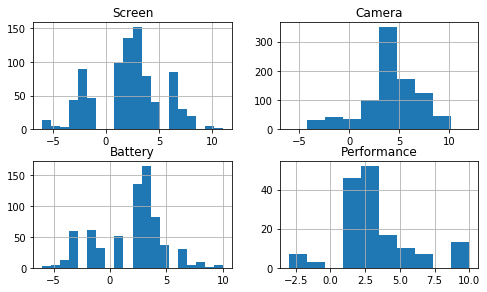

In [36]:
BRAND = 'samsung'


sel_brand = phrasesDF[phrasesDF['brand'] == BRAND]

sel_brand = sel_brand.query('afinn_sentiment < -0.1 or afinn_sentiment > 0.1')  

sel_brand_battery = sel_brand[sel_brand['aspect'] == 'battery']['afinn_sentiment']
sel_brand_screen = sel_brand[sel_brand['aspect'] == 'screen']['afinn_sentiment']
sel_brand_camera = sel_brand[sel_brand['aspect'] == 'camera']['afinn_sentiment']
sel_brand_performance = sel_brand[sel_brand['aspect'] == 'performance']['afinn_sentiment']


import matplotlib
%matplotlib inline  
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
plt.tight_layout()

axes[0,0].set_title("Screen")
axes[0,1].set_title("Camera")
axes[1,0].set_title("Battery")
axes[1,1].set_title("Performance")

sel_brand_screen.hist(ax=axes[0,0], bins=20)
sel_brand_camera.hist(ax=axes[0,1])
sel_brand_battery.hist(ax=axes[1,0], bins=20)
sel_brand_performance.hist(ax=axes[1,1])

In [37]:
## Find which brands have most of the reviews, and drop the ones with fewer reviews
topBrandsDF = phrasesDF.groupby(['brand']).count()
topBrandsDF = topBrandsDF['phrase'].sort_values(ascending = False)[1:20]
topBrands = topBrandsDF.index.values
topBrandsDF

brand
huawei        4351
htc           4088
samsung       4051
blackberry    2192
iphone        1925
xiaomi         647
oppo           363
Name: phrase, dtype: int64

In [38]:
# Make a dataframe with only the most reviewed brands 
mostBrandsReviews = phrasesDF[phrasesDF['brand'].isin(topBrands)] 
# Group by brand and aspect
s1 = mostBrandsReviews.groupby(['brand', 'aspect'])['afinn_sentiment'].mean()
mostBrandsReviews = pd.DataFrame(s1, columns=['afinn_sentiment'])

# Make a flat version of this DF
mostBrandsReviewsFlat = mostBrandsReviews.stack().reset_index()
mostBrandsReviewsFlat.columns.values
mostBrandsReviewsFlat['meanReview'] = mostBrandsReviewsFlat[0]
mostBrandsReviewsFlat = mostBrandsReviewsFlat.drop(['level_2', 0], axis=1)

mostBrandsReviews.head(15)

afinn_sentiment
brand      aspect                      
blackberry battery            -0.165537
           camera              0.916290
           performance         2.854545
           screen              0.318731
htc        battery             0.207921
           camera              1.720254
           performance         2.632911
           screen              0.857686
huawei     battery             1.356717
           camera              2.529358
           performance         1.787879
           screen              1.355026
iphone     battery            -0.020339
           camera              0.435644
           performance         2.675676

In [39]:

aspect = 'battery'
mostBrandsReviewsFlat[mostBrandsReviewsFlat['aspect'] == aspect].sort_values(by=['meanReview'], ascending = False)[0:3]

,brand,aspect,meanReview
16,oppo,battery,1.776316
24,xiaomi,battery,1.401460
8,huawei,battery,1.356717


In [40]:
aspect = 'screen'
mostBrandsReviewsFlat[mostBrandsReviewsFlat['aspect'] == aspect].sort_values(by=['meanReview'], ascending = False)[0:3]

,brand,aspect,meanReview
19,oppo,screen,2.815789
27,xiaomi,screen,1.677966
11,huawei,screen,1.355026


In [41]:
aspect = 'battery'
mostBrandsReviewsFlat[mostBrandsReviewsFlat['aspect'] == aspect].sort_values(by=['meanReview'], ascending = True)[0:3]

,brand,aspect,meanReview
0,blackberry,battery,-0.165537
12,iphone,battery,-0.020339
4,htc,battery,0.207921


In [42]:
s1 = phrasesDF.groupby(['review_id'])['afinn_sentiment'].mean()
resultsDF = pd.DataFrame(s1, columns=['afinn_sentiment'])
resultsDF['avg_afinn_sentiment'] = phrasesDF.groupby(['review_id'])['afinn_sentiment'].mean()
resultsDF['rating'] = phrasesDF.groupby(['review_id'])['rating'].mean()
resultsDF = resultsDF.query('rating == 1 and avg_afinn_sentiment > .8')
phrasesDF[ phrasesDF['review_id'].isin(resultsDF.index)]

,brand,phrase,rating,aspect,review_id,afinn_sentiment,comp_score,label
11,samsung,Battery life sub par,1,battery,8,0.0,ok,1
12,samsung,Camera does n't quite compare,1,camera,8,0.0,ok,1
13,samsung,quite compare old phone Leica camera which fig...,1,camera,8,0.0,ok,1
14,samsung,The screen spectacular and super bright,1,screen,8,4.0,best,4
62,samsung,Battery life sub par,1,battery,43,0.0,ok,1
...,...,...,...,...,...,...,...,...
21674,htc,tried all best settings for camera but still p...,1,camera,58762,3.0,best,4
21758,htc,Phone battery runs down super fast,1,battery,58949,3.0,best,4
21906,oppo,Oppo f11 pro camera nit good clear picture,1,camera,59091,4.0,best,4
21907,oppo,camera nit good clear picture camera like not ...,1,camera,59091,6.0,best,4
